# In this notebook, we are qualitatively building categories


# Category Building :

## Pharmacology

### Subcategories:

1. Pharmacokinetics
2. Pharmacodynamics
   1. Forced Swimming Test
3. Pharmacogenetics
4. Toxicology?
5. Pharmacoepidemiology?

## Treatment in Special Populations

### Subcategories:

1. Pregnant women
2. Children
3. Elderly
4. Disease states (e.g. renal failure, diabetes, cancer, parkinsons, etc.)

## Disorders/Diseases (can also be interpreted as expansion of indication)

### Subcategories:

1. Depression
2. Anxiety
3. Schizophrenia
4. Bipolar disorder
5. OCD
6. Pain
7. Sleep

## Drug Focused

### Subcategories:

1. Fluoxetine
2. Sertraline
   etc

## Animal Focused

### Subcategories:

1. chronic unpredictable mild stress in mice
2. forced swimming test

## Safety

### Subcategories:

1. Bleeding
2. Cardiac
3. Withdrawal

# Open Questions:

1. How to deal with non-exclusive categories?

   1.1 Multiple categories per paper?

2. Using all clusters?
3. Merging some clusters?


In [17]:
%load_ext autoreload
%autoreload 2

In [18]:
import pandas as pd
import json

# load and prep data


In [19]:
params = "alpha0.3_k20_res0.005"
p = f"../data/06-clustered-df/{params}.pkl"
df = pd.read_pickle(p)
df.head(3)

,eid,title,date,first_author,abstract,doi,year,auth_year,unique_auth_year,pubmed_id,...,article_number,reference_eids,nr_references,filtered_reference_eids,nr_filtered_references,keep,specter2_embeddings,title_abstract,cluster_alpha0.3_k20_res0.005,centrality_alpha0.3_k20_res0.005
0,2-s2.0-0020316326,Serotonergic mechanism in the control of β-end...,1982-04-12,Bruni J.F.,The role of the serotonergic mechanism in the ...,10.1016/0024-3205(82)90686-5,1982,Bruni_1982,Bruni_1982,6283286.0,...,NaN,"[2-s2.0-0016795422, 2-s2.0-0000011578, 2-s2.0-...",46,[],0,0,"[-0.38758993, 0.8743463, -0.52714413, 0.029653...",Serotonergic mechanism in the control of β-end...,58,0.267480
1,2-s2.0-0019936013,EFFECTS OF PAROXETINE ON SYNAPTOSOMAL NEUROTRA...,1982-01-01,Magnussen I.,NaN,10.1111/j.1600-0404.1982.tb03382.x,1982,Magnussen_1982,Magnussen_1982_4,NaN,...,NaN,[],0,[],0,1,"[0.32906824, 0.23448014, -0.6597943, 0.1363538...",EFFECTS OF PAROXETINE ON SYNAPTOSOMAL NEUROTRA...,36,0.094434
2,2-s2.0-0020058010,Treatment of intention myoclonus with paroxeti...,1982-01-01,Magnussen I.,NaN,NaN,1982,Magnussen_1982,Magnussen_1982_3,NaN,...,NaN,[],0,[],0,1,"[0.40660483, 1.0992041, -0.6012529, 0.7322493,...",Treatment of intention myoclonus with paroxeti...,62,0.075132


In [20]:
# value counts of clusters
df["cluster_alpha0.3_k20_res0.005"].value_counts()

0      985
1      935
2      873
3      792
4      724
      ... 
156     21
157      6
158      5
159      1
160      1
Name: cluster_alpha0.3_k20_res0.005, Length: 161, dtype: int64

# helper func


In [21]:
def cluster_title_print(df,  cluster, random=False, n=10, random_state=1887):
    """
    Print titles of documents belonging to a specific cluster.

    Args:
    - df: DataFrame containing document data.
    - cluster: Cluster number for which titles are to be printed.
    - random: Whether to select titles randomly. Defaults to False.
    - n: Number of titles to print. Defaults to 10.
    - random_state: Seed for random sampling. Defaults to None.

    Returns:
    - None
    """
    # Filter DataFrame for the specified cluster
    cluster_df = df[df["cluster_alpha0.3_k20_res0.005"] == cluster]
    
    # Sort DataFrame by centrality
    cluster_df = cluster_df.sort_values(by="centrality_alpha0.3_k20_res0.005", ascending=False)
    
    # Select titles
    if random:
        titles = cluster_df.sample(n, random_state=random_state)['title'].values
    else:
        titles = cluster_df.head(n)['title'].values
    
    # Print titles
    print(f"Cluster {cluster}:")
    for title in titles:
        print(title)
        print("# " * 30)
    print("\n")

cluster_title_print(df= df,cluster= 101, random=True, n=3, random_state=None)

Cluster 101:
Gateways to clinical trials
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
Gateways to Clinical Trials
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
Electro interstitial scan system: Assessment of 10 years of research and development
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 




# Clusters labels are arrived at by assessing the file:

`Study-1-Bibliometrics/output/tables/cluster-explorer/FinalSelect/SingleSolExplorer_alpha0.3_k20_res0.005.xlsx`


In [22]:
cluster_labels = {
    0: "ocd",
    1: "pregnancy",
    2: "determining drug concentration",
    3: "chronic unpredictable mild stress in mice",
    4: "serotinin receptor studies",
    5: "Cytochrome P450",
    6: "effect on fish",
    7: "wastewater",
    8: "In vivo pregnancy",
    9: "Drug utilisation",
    10: "PTSD",
    11: "sexual dysfunction",
    12: "fluoxetine; diverse",
    13: "pediatric depression pharmacotherapy",
    14: "forced swimming test",
    15: "pharmacotherapy of depression review",
    16: "Polymorphism",
    17: "Serotonin syndrome",
    18: "Depression treatment in carciovascular pathologies",
    19: "Paroxetine, diverse",
    20: "StarD",
    21: "Pain",
    22: "post stroke depression",
    23: "inflammation and serotonin",
    24: "review of antidepressant medications",
    25: "weight management",
    26: "geriatric use of antidepressants",  # as ads in dementia but also against agitation
    27: "Brain Derived Neurotrophic Factor",
    28: "suicide risk",
    29: "hippocampal neurogenesis",
    30: "fear",
    31: "panic disorder",
    32: "treatment response biomarker",  # where does this go within pharmacology?
    33: "bleeding risk",
    34: "natural products",
    35: "Anxiety",
    36: "paroxetine binding",
    37: "fracture risk",
    38: "cancer",  # the cluster is on cancer risk as well as protection
    39: "Dermatology",  # psychosomatic / psychodermatology
    40: "covid",  # almost exclusively fluvoxamine
    41: "alcoholism",
    42: "irritable bowel disease",
    43: "premature ejaculation",
    44: "analytical chemistry",  # determine concentration in tablets
    45: "sleep",
    46: "eating disorders",
    47: "neuroimaging",  # uses human, in vivo, and in vitro studies. put it in any?
    48: "parkinson's disease",
    49: "drug-drug interaction",
    50: "ssri toxicity",
    51: "sertraline, diverse",
    52: "bipolar disorder",
    53: "affective effects",
    54: "fluvoxamine",
    55: "hot flushes (menopause)",
    56: "diabetes",  # both as side effect and depression management in special pop
    57: "autoreceptors",  # rather unclear to me
    58: "neuroendocrine system",  # mixed study subjects (human, animal, in vitro)
    59: "cocaine addiction",
    60: "venlafaxine for depression",
    61: "schizophrenia",
    62: "extrapyramidal side effects",  #  movement dysfunctions
    63: "anxiety",  # check merge with 35
    64: "clinical pharmacogenetics",
    65: "synthesis and production",
    66: "escitalopram for depression",
    67: "epilepsy",  # special pop and induced seizures
    68: "pediatric drug utilisation",  # check merge with 9
    69: "autism",
    70: "premenstrual syndromes",
    71: "QT prolongation",
    72: "chronic/prolonged use",
    73: "pharmacoeconomics/health economics",
    74: "ion channels",
    75: "MDMA",
    76: "cognitive function",
    77: "serotonin transporter",
    78: "pulmonary hypertension",
    79: "citalopram",
    80: "synthesis and compounds?",  # need help here
    81: "enantiomer of citalopram",  # someonee help me here (analyze pharmaceutical formulations in vitro to assess the composition and concentration of citalopram and its metabolites.?)
    82: "hyponatremia",  # low sodium in blood
    83: "geriatric depression treatment",
    84: "sertraline diverse",
    85: "comparative studies",
    86: "hepatic effects",  # (on the liver)
    87: "borderline personality disorder",
    88: "compulsions? body dysmorphic disorder? ",
    89: "gut microbiota",
    90: "withdrawal symptoms",
    91: "drug quantification (sertraline)",
    92: "lactation",  # put in pregnancy category?
    93: "pediatric anxiety",
    94: "Neurosteroids",
    95: "astrocytic receptors",
    96: "Neurological Disorders and Emotional Dysregulation",
    97: "male fertility",  # testicular tissue and sperm quality
    98: "vitamin supplements for depression",  # folic acid",vitamin B12 and B9
    99: "seasonal affective disorder",  # light therapy
    100: "safety reviews",
    101: "gateway to clinical trials",  # has lots of garbage
    102: "fibromyalgia",  # merge with pain? (widespread musculoskeletal pain, fatigue, sleep disturbances, cognitive difficulties)
    103: "ssri reviews",  # lots of garbage
    104: "marbe burying test",  # animal model for anxiety
    105: "vilazodone for depression",
    106: "depression in cancer patients",
    107: "lipid metabolism",  # in vivo and vitro studies, some human, what now?
    108: "neurotrophic factors, clinical",  # (like bdnf); biomarker?
    109: "Loudness Dependence of Auditory Evoked Potentials (LDAEP)",  # bit of garbage # garbage of depression response?
    110: "headache",  # migraine and tension
    111: " stress urinary incontinence (SUI)",
    112: "st johns worth",
    113: "ssris",  # no abstracts, ssri only
    114: "depression in renal disease",
    115: "glaucoma risk",
    116: "agomelatine for depression",
    117: "acupuncture for depression",
    118: "neuropsychiatric disorders",  # , including catatonia, Tourette's syndrome
    119: "hypothermia",
    120: "galanin system",
    121: "recurrent depression",
    122: "dysthymia",
    123: "generic drugs",
    124: "trichoillomania",
    125: "addictions",  # gambling mainly # merge with above to "behavioral disorders?  "
    126: "mania risk",
    127: "zinc and depression",
    128: "traumatic brain injury (TBI)",
    129: "Galactorrhea",  # breasts leak milk
    130: "Syncope",  # fainting; treatment
    131: "exercise and depression",
    132: "sigma 1 receptor",  # is this in vivo?
    133: "critical psychiatry",
    134: "G protein",  # -coupled receptor kinase 2 (GRK2) inhibitors", #  therapeutic applications in cardiovascular diseases, inflammation, and other related. NEEDS CHECK
    135: "hepatitis C",  # special pop
    136: "thyroid levels",  # as risk and as adjunct treatment
    137: "oral cavity",  # burning mouth syndrome
    138: "depression in HIV",  # special pop
    139: "veterinary use",  # dogs mostly
    140: "electric current therapy",  # electroconvulsive therapy
    141: "olfactory bulbectomy",  # Researchers use this model to investigate the underlying neurobiological mechanisms of depression and to test potential antidepressant treatments.
    142: "excitatory/inhibitory effects",
    143: "multiple sclerosis",  # special pop and impact on ms
    #############################
    # form here less than 50 papers
    #############################
    144: "neurotransmitter release estimation",  # in vivo
    145: "restless legs syndrome",  # treatment
    146: "chronic obstructive pulmonary disease (COPD)",  # special pop
    147: "mutism",
    148: "tryptophan metabolism",  #
    149: "Congenital myasthenic syndromes",
    150: "reboxetine for depression",
    151: "escitalopram, diverse",  # no abstracts, garbage.
    152: "statins for depression",
    153: "blood brain barrier",  #
    154: "animal neuroscience",  # unclear
    155: "hormonal fluctuations",
    156: "Gastroprotective Effects",
    157: "too few",
    158: "too few",
    159: "too few",
    160: "too few",
}


path = f"../output/cluster-qualifications/cluster_labels_{params}.json"

with open(path, "w") as f:
    json.dump(cluster_labels, f)

# fit the labels to the tree. main quesitons are:

1. is is pharmacology?
   which are of pharmacology
2. is it perfomed in vivo, vitro, or human?
3. is it a special population?
4. is the focus on the drug
5. is the focus on the disease

TO DO:

1. Improve granularity (No Cluster Names in the tree)
2. Move safety to clinical studies
3. put these inside in vivo studies!
   "animal models of disorders": {
   "chronic unpredictable mild stress": [3],
   "forced swimming test": [14],
   "marble burying test (anxiety, ocd)": [104],
   "ofaction bulbectomy": [141]
   },
4. put these inside in vivo studies!
5. put reviews also under clinical evidence.
   "Reviews":
   15, 24, 35, 51, 52, 55, 60, 63, 66, 68, 69, 76, 79, 83, 84, 85, 87, 90,
   92, 93, 100, 103, 106, 110, 113, 150
6. put these within clinical category
   "Drug": {
   "Fluoxetine": [12],
   "Paroxetine": [19, 36],
   "Sertraline": [51, 84],
   "Fluvoxamine": [54],
   "Citalopram": [79],
   "Escitalopram": [66, 151],
   "Venlafaxine": [60],
   "Vilazodone": [105],
   "Agomelatine": [116],
   "reboxetine": [150],
   "statins": [152]
   },


In [50]:
cluster_tree = {
    "Pharmacology": {
        "Pharmacokinetics": {
            "Analytical Methods": [2, 44, 81, 91],
            "Cytochromes": [5],
            "blood brain barrier": [153],
        },
        "Pharmacodynamics": {
            "Metabolism": [],
            "Mechanism of Action": {
                "Receptor studies": [4, 36, 57],
                "Animal models": [3, 14],
                "hippocampal neurogenesis": [29],
                "neuroimaging": [47],
                "neuroendocrine system": [47],
                "ion channels": [74],
                "serotonin transporter": [77],
                "synthesis and compounds?": [80],
                "gut microbiota": [89],
                "neurosteroids": [94],
                "astrocytic receptors": [95],
                "lipid metabolism": [107],
                "neurotrophic factors": [108],
                "Loudness Dependence of Auditory Evoked Potentials (LDAEP)": [109],
                "galanin system": [120],
                "sigma 1 receptor": [132],
                "ofaction bulbectomy": [141],
                "tryptophan metabolism": [148],
            },
            "inflammation": [23],
            "fear": [30],
            "prolonged use": [72],
            "pulmonary hypertension": [78],
            "male fertility": [97],
            "G protein": [134],
            "excitatory/inhibitory effects": [142],
            "neurotransmitter release estimation": [144],
            "animal neuroscience": [154],
            "hormonal fluctuations": [155],
        },
        "Pharmacogenetics": {
            "Polymorphism": [16],
            "BDNF": [27],
            "clinical pharmacogenetics": [64],
        },
        "Pharmacoepidemiology": {"Drug utilisation": [9, 68]},
        "Review": {"Review of antidepressant medications": [24]},
    },
    "Disorder/Disease": {
        "Depression": [
            3,
            13,
            15,
            16,
            18,
            20,
            22,
            28,
            32,
            60,
            64,
            66,
            73,
            83,
            85,
            98,
            105,
            106,
            112,
            116,
            117,
            121,
            122,
            123,
            127,
            128,
            131,
            135,
            136,
            138,
            140,
            146,
            150,
            152,
        ],
        "Anxiety": [30, 35, 63, 93],
        "OCD": [0],
        "PTSD": [10],
        "Panic Disorder": [31],
        "Pain": [21],
        "Inflammations": [23, 134],
        "Weight Management": [25],
        "Agitation in dementia": [26],
        "Dermatology": [39],
        "Covid": [40],
        "alcohol dependence": [41],
        "irretable bowel disease": [42],
        "premature ejaculation": [43],
        "sleep": [45],
        "eating disorders": [46],
        "bipolar disorder": [46],
        "hot flushes": [55],
        "diabetes": [56],
        "cocaine addiction": [59],
        "schizophrenia": [61],
        "epilepsy": [67],
        "autism": [69],
        "premenstrual syndromes": [70],
        "Borderline Personlaity Disorder": [87],
        "Neurological Disorders": [96],
        "seasonal affective disorder": [99],
        "fibromyalgia": [102],
        "headache": [110],
        "renal disease": [114],
        "neuropsychiatric disorders": [118],
        "addictions": [125],
        "trichotillomania": [124],
        "traumatic brain injury": [128],
        "syncope": [130],
        "cardiovascular diseases": [134],
        "oral cavity": [137],
        "multiple sclerosis": [143],
        "mutism": [147],
        "Congenital myasthenic syndromes": [149],
        "gastroprotective effects": [156],
    },
    "Safety": {  # or pharmacovigilance?
        "Serotonin syndrom": [17],
        "Sexual dysfunction": [11],
        "Suicide": [13, 28],
        "Bleeding": [33],
        "Fracture": [37],
        "Cancer": [38],
        "SSRI Toxicity": [50],
        "diabetes": [56],
        "extrapyramidal side effects": [62],
        "qt prolongation": [71],
        "prolonged use": [72],
        "hyponatremia": [82],
        "hepatic effects": [86],
        "withdrawal": [86],
        "male fertility": [97],
        "safety reviews": [100],
        "stress urinary incontinence": [111],
        "glaucoma risk": [115],
        "mania": [126],
        "Galactorrhea": [129],
        "restless legs syndrom": [145],
    },
    "Study type": {
        "Clinical Focus": [
            0,
            1,
            10,
            11,
            13,
            16,
            17,
            18,
            20,
            21,
            22,
            23,
            24,
            25,
            26,
            28,
            31,
            32,
            33,
            35,
            37,
            38,
            39,
            41,
            43,
            45,
            46,
            48,
            49,
            50,
            54,
            55,
            56,
            60,
            61,
            62,
            63,
            64,
            66,
            67,
            68,
            69,
            71,
            76,
            79,
            82,
            83,
            84,
            85,
            86,
            87,
            90,
            92,
            93,
            96,
            98,
            100,
            102,
            103,
            105,
            108,
            109,
            110,
            112,
            113,
            114,
            116,
            117,
            118,
            121,
            122,
            123,
            124,
            125,
            128,
            130,
            131,
            135,
            136,
            137,
            138,
            140,
            143,
            145,
            146,
            147,
            148,
            149,
            150,
            152,
        ],
        "Preclinical Focus": {
            "animal models of disorders": {
                "chronic unpredictable mild stress": [3],
                "forced swimming test": [14],
                "marble burying test (anxiety, ocd)": [104],
                "ofaction bulbectomy": [141],
            },
            "in vivo": [
                4,
                5,
                8,
                21,
                27,
                29,
                30,
                34,
                36,
                57,
                59,
                72,
                75,
                77,
                78,
                89,
                94,
                97,
                99,
                104,
                119,
                120,
                127,
                141,
                142,
                144,
                153,
                154,
                156,
            ],
            "in vitro": [44, 74, 81, 91],
        },
        "Environmental Focus": {
            "Fish": [6],
            "Wastewater": [7],
        },
        "Reviews": [
            15,
            24,
            35,
            51,
            52,
            55,
            60,
            63,
            66,
            68,
            69,
            76,
            79,
            83,
            84,
            85,
            87,
            90,
            92,
            93,
            100,
            103,
            106,
            110,
            113,
            150,  # can things be in reviews and in clinical?
        ],
        "Comparative studies": [20, 54],
    },
    "Special Populations": {
        "pregnancy": [1, 8, 92],  # 92 is lactation
        "pediatrics": [13, 28, 93],
        "cardiovascular pathologies": [18],
        "post stroke": [22],
        "geriatrics": [
            26,
            37,
            48,
            49,
            76,
            82,  # mainly on a side effect that is more common in elderly
            83,
            111,
        ],
        "diabetes": [56],
        "cancer": [106],
        "renal disease": [114],
        "hepatitis C": [135],
        "HIV": [138],
        "chronic obstructive pulmonary disease": [146],
    },
    "Drug": {
        "Fluoxetine": [12],
        "Paroxetine": [19, 36],
        "Sertraline": [51, 84],
        "Fluvoxamine": [54],
        "Citalopram": [79],
        "Escitalopram": [66, 151],
        "Venlafaxine": [60],
        "Vilazodone": [105],
        "Agomelatine": [116],
        "reboxetine": [150],
        "statins": [152],
    },
    "Other": {
        "Natural Products": [34],
        "affective effects": [53],
        "synthesis and production": [65],
        "health economics": [73, 123],
        "st johns wort": [112],
        "critical psychiatry": [133],
        "veterinary use": [139],
    },
}


with open(f"../output/cluster-qualifications/cluster_tree_{params}_attempt1.json", "w") as f:
    json.dump(cluster_tree, f)

cluster_tree.keys()

dict_keys(['Pharmacology', 'Disorder/Disease', 'Safety', 'Study type', 'Special Populations', 'Drug', 'Other'])

# NEW ATTEMPT


In [65]:
cluster_tree = {
    "Pharmacology": {
        "Pharmacokinetics": {
            "Analytical Methods": [2, 44, 81, 91],
            "other": [5, 153],
        },
        "Pharmacodynamics": {
            "Mechanism of Action": 
                 [
                 4, 36, 57, 3, 14, 29, 47, 47, 74, 77, 80, 89, 94, 95, 107, 108, 109, 120, 132, 141, 148,
                 ],
            "other": [23, 30, 72, 78, 97, 134, 142, 144, 154, 155,]
        },
        "Pharmacogenetics": [
                16, 27, 64,
        ],
        "other": {"Drug utilisation": [9, 68],
                  "Review of antidepressant medications": [24]
                  },
    },
    "Disorder/Disease": {
        "Depression": [
            3, 13, 15, 16, 18, 20,22, 28, 32, 60, 64, 66, 73, 83, 85, 98, 105, 106, 112, 116, 117, 121, 122, 123, 127, 128, 131, 135, 136, 138, 140, 146, 150, 152,
        ],
        "Anxiety": [30, 35, 63, 93],
        "Inflammations": [23, 134],
        "other": [
            0, 10, 31, 21, 25, 26, 39, 40, 41, 42, 43, 45, 46, 46, 55, 56, 59, 61, 67, 69, 70, 87, 96, 99, 102, 110, 114, 118, 125, 124, 128, 130, 134, 137, 143, 147, 149, 156,]
    },
    "Safety": [
            17, 11, 28, 33, 37, 38, 50, 56, 62, 71, 72, 82, 86, 86, 97, 100, 111, 115, 126, 129, 145,
    ],
    "Study type": {
        "Clinical Evidence": 
            [ 0, 1, 10, 11, 13, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 28, 31, 32, 33, 35, 37, 38, 39, 41, 43, 45, 46, 48, 49, 50, 54, 55, 56, 60, 61, 62, 63, 64, 66, 67, 68, 69, 71, 76, 79, 82, 83, 84, 85, 86, 87, 90, 92, 93, 96, 98, 100, 102, 103, 105, 108, 109, 110, 112, 113, 114, 116, 117, 118, 121, 122, 123, 124, 125, 128, 130, 131, 135, 136, 137, 138, 140, 143, 145, 146, 147, 148, 149, 150, 152,
        ],
        "Preclinical Evidence": {
            "in vivo": {
                "animal models of disorders": [ 3, 14, 104, 141],
                "other": [
                4, 5, 8, 21, 27, 29, 30, 34, 36, 57, 59, 72, 75, 77, 78, 89, 94, 97, 99, 104, 119, 120, 127, 141, 142, 144, 153, 154, 156,
            ]},
            "in vitro": [44, 74, 81, 91],
        },
        "Environmental Evidence": {
            "Fish": [6],
            "Wastewater": [7],
        },
        "Reviews": [
            15, 24, 35, 51, 52, 55, 60, 63, 66, 68, 69, 76, 79, 83, 84, 85, 87, 90, 92, 93, 100, 103, 106, 110, 113, 150,  # can things be in reviews and in clinical?
        ],
        "Comparative studies": [20, 54],
    },

    "Drug": {
        "Fluoxetine": [12],
        "Paroxetine": [19, 36],
        "Sertraline": [51, 84],
        "Fluvoxamine": [54],
        "Citalopram": [79],
        "Escitalopram": [66, 151],
        "Venlafaxine": [60],
        "Vilazodone": [105],
        "Agomelatine": [116],
        "reboxetine": [150],
        "statins": [152],
    },
    "Other": {
        "health economics": [73, 123],
        "other" : [34, 53, 65, 112, 133, 139,]
    },
}


with open(f"../output/cluster-qualifications/cluster_tree_{params}_attempt2.json", "w") as f:
    json.dump(cluster_tree, f)

cluster_tree.keys()

dict_keys(['Pharmacology', 'Disorder/Disease', 'Safety', 'Study type', 'Drug', 'Other'])

In [66]:

for key, _ in cluster_tree.items():
    print(key)
    if isinstance(cluster_tree[key], dict):
        print(cluster_tree[key].keys())


Pharmacology
dict_keys(['Pharmacokinetics', 'Pharmacodynamics', 'Pharmacogenetics', 'other'])
Disorder/Disease
dict_keys(['Depression', 'Anxiety', 'Inflammations', 'other'])
Safety
Study type
dict_keys(['Clinical Evidence', 'Preclinical Evidence', 'Environmental Evidence', 'Reviews', 'Comparative studies'])
Drug
dict_keys(['Fluoxetine', 'Paroxetine', 'Sertraline', 'Fluvoxamine', 'Citalopram', 'Escitalopram', 'Venlafaxine', 'Vilazodone', 'Agomelatine', 'reboxetine', 'statins'])
Other
dict_keys(['health economics', 'other'])


# prepare dataset


In [26]:

def find_branches(cluster, tree, cluster_labels, current_path=None):
    """
    Recursively find all branches for a given cluster in a tree structure.

    Args:
    - cluster: The cluster for which branches are to be found.
    - tree: The tree structure containing branches.
    - cluster_labels: Dictionary mapping clusters to labels.
    - current_path: List containing the current branch path.

    Returns:
    - branches: List of all branches for the given cluster.
    """
    if current_path is None:
        current_path = []
    branches = []
    for branch, subbranches in tree.items():
        current_path.append(branch)
        if isinstance(subbranches, dict):
            branches.extend(find_branches(cluster, subbranches, cluster_labels, current_path.copy()))
        else:
            if cluster in subbranches:
                branches.append(" > ".join(current_path))
        current_path.pop()
    return branches

def construct_cluster_full_tree(cluster_labels, cluster_tree):
    """
    Construct cluster_full_tree containing branches for each cluster.

    Args:
    - cluster_labels: Dictionary mapping clusters to labels.
    - cluster_tree: Tree structure containing branches.

    Returns:
    - cluster_full_tree: Dictionary containing branches for each cluster.
    """
    cluster_full_tree = {}
    for cluster, label in cluster_labels.items():
        branches = find_branches(cluster, cluster_tree, cluster_labels)
        cluster_full_tree[cluster] = [label.upper()] + branches
    return cluster_full_tree

def construct_df_dict(cluster_full_tree):
    """
    Construct a dictionary suitable for creating a DataFrame from the given cluster_full_tree.

    Args:
    - cluster_full_tree: Dictionary containing branches for each cluster.

    Returns:
    - df_dict: Dictionary suitable for creating a DataFrame.
    """
    df_dict = {}
    max_len = 0
    for cluster, branches in cluster_full_tree.items():
        label = branches[0]
        cluster_branches = []
        for branch in branches[1:]:
            branch_items = branch.split(" > ")
            cluster_branches.append(branch_items)
            max_len = max(max_len, len(branch_items))
        df_dict[f'{cluster}:{label}'] = cluster_branches
    return df_dict

# Assuming cluster_labels and cluster_tree are already defined

# Construct cluster_full_tree
cluster_full_tree = construct_cluster_full_tree(cluster_labels, cluster_tree)

# Construct df_dict
df_dict = construct_df_dict(cluster_full_tree)

# Extract lengths of all branches across clusters
max_branch_lengths = max(len(branch) for branches in df_dict.values() for branch in branches)

# Add empty strings to branches shorter than the longest branch
for branches in df_dict.values():
    for branch in branches:
        branch.extend([""] * (max_branch_lengths - len(branch)))

# Build DataFrame where one index has multiple rows
df_rows = []
for cluster, branches in df_dict.items():
    for branch in branches:
        df_rows.append([cluster] + branch)

# Create DataFrame
df_paths = pd.DataFrame(df_rows, columns=["cluster"] + [f"branch_depth{i}" for i in range(1, max_branch_lengths + 1)])

# Split cluster column to separate cluster and label
df_paths[['cluster', 'label']] = df_paths['cluster'].str.split(':', n=1, expand=True)

cols = df_paths.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_paths = df_paths[cols]

df_paths.head()

,label,cluster,branch_depth1,branch_depth2,branch_depth3,branch_depth4
0,OCD,0,Disorder/Disease,other,,
1,OCD,0,Study type,Clinical Evidence,,
2,PREGNANCY,1,Study type,Clinical Evidence,,
3,DETERMINING DRUG CONCENTRATION,2,Pharmacology,Pharmacokinetics,Analytical Methods,
4,CHRONIC UNPREDICTABLE MILD STRESS IN MICE,3,Pharmacology,Pharmacodynamics,Mechanism of Action,


In [74]:
# remove duplicates based on branch 1 to 4
df_paths_xs = df_paths.drop_duplicates(subset=df_paths.columns[2:6]).reset_index(drop=True)
df_paths_xs = df_paths_xs.drop(columns=["label", "cluster"])
# sort after branch 1 to 4
df_paths_xs = df_paths_xs.sort_values(by=df_paths_xs.columns[0:5].tolist())
df_paths_xs.head(30)

,branch_depth1,branch_depth2,branch_depth3,branch_depth4
20,Disorder/Disease,Anxiety,,
4,Disorder/Disease,Depression,,
18,Disorder/Disease,Inflammations,,
0,Disorder/Disease,other,,
30,Drug,Agomelatine,,
28,Drug,Citalopram,,
26,Drug,Escitalopram,,
12,Drug,Fluoxetine,,
24,Drug,Fluvoxamine,,
15,Drug,Paroxetine,,


'branch_depth1,branch_depth2,branch_depth3,branch_depth4\nDisorder/Disease,other,,\nStudy type,Clinical Evidence,,\nPharmacology,Pharmacokinetics,Analytical Methods,\nPharmacology,Pharmacodynamics,Mechanism of Action,\nDisorder/Disease,Depression,,\nStudy type,Preclinical Evidence,in vivo,animal models of disorders\nStudy type,Preclinical Evidence,in vivo,other\nPharmacology,Pharmacokinetics,other,\nStudy type,Environmental Evidence,Fish,\nStudy type,Environmental Evidence,Wastewater,\nPharmacology,other,Drug utilisation,\nSafety,,,\nDrug,Fluoxetine,,\nStudy type,Reviews,,\nPharmacology,Pharmacogenetics,,\nDrug,Paroxetine,,\nStudy type,Comparative studies,,\nPharmacology,Pharmacodynamics,other,\nDisorder/Disease,Inflammations,,\nPharmacology,other,Review of antidepressant medications,\nDisorder/Disease,Anxiety,,\nOther,other,,\nStudy type,Preclinical Evidence,in vitro,\nDrug,Sertraline,,\nDrug,Fluvoxamine,,\nDrug,Venlafaxine,,\nDrug,Escitalopram,,\nOther,health economics,,\nDrug,Citalo

In [52]:
#  save to excel

from openpyxl import load_workbook
from openpyxl.styles import Font

def increase_fontsize(path):
    # Load the workbook
    wb = load_workbook(path)

    # Select the active worksheet
    ws = wb.active

    # Iterate over the cells in the worksheet and set the font size
    for row in ws.iter_rows():
        for cell in row:
            cell.font = Font(size=14)  # Set the font size to 14

    # Save the workbook
    wb.save(path)


# Your existing line of code
df_paths.to_excel(f"../output/cluster-qualifications/cluster_tree_{params}.xlsx", index=False,)


increase_fontsize(path = f"../output/cluster-qualifications/cluster_tree_{params}.xlsx")

In [53]:
print(df_paths['branch_depth1'].value_counts())
# only disorder/disease
df_paths_dd = df_paths[df_paths['branch_depth1'] == 'Study type']

print(df_paths_dd['branch_depth2'].value_counts())

Study type          157
Disorder/Disease     77
Pharmacology         42
Safety               20
Drug                 14
Other                 8
Name: branch_depth1, dtype: int64
Clinical Evidence         90
Preclinical Evidence      37
Reviews                   26
Environmental Evidence     2
Comparative studies        2
Name: branch_depth2, dtype: int64


# try outs


In [54]:
import sys 
sys.path.append("/Users/jlq293/Projects/Study-1-Bibliometrics/src/network/")
from creation.PartitionCreator import PartitionCreator
from analysis.NetworkAnalyzer import CommunityExplorer, FullExplorer
from analysis.NetworkAnalyzerUtils import NetworkAnalyzerUtils

,label,cluster,branch_depth1,branch_depth2,branch_depth3,branch_depth4
0,OCD,0,Disorder/Disease,other,,
1,OCD,0,Study type,Clinical Evidence,,
2,PREGNANCY,1,Study type,Clinical Evidence,,
3,DETERMINING DRUG CONCENTRATION,2,Pharmacology,Pharmacokinetics,Analytical Methods,
4,CHRONIC UNPREDICTABLE MILD STRESS IN MICE,3,Pharmacology,Pharmacodynamics,Mechanism of Action,
...,...,...,...,...,...,...
313,ANIMAL NEUROSCIENCE,154,Pharmacology,Pharmacodynamics,other,
314,ANIMAL NEUROSCIENCE,154,Study type,Preclinical Evidence,in vivo,other
315,HORMONAL FLUCTUATIONS,155,Pharmacology,Pharmacodynamics,other,
316,GASTROPROTECTIVE EFFECTS,156,Disorder/Disease,other,,


In [33]:
ce = CommunityExplorer(
    df=df,
    cluster_column=f"cluster_{params}",
    sort_column=f"centrality_{params}",
    nr_tiles=20,
)

ce.create_full_explorer()
df_summary, cluster_titles_sheets_dict = ce.full_return()



In [34]:
# save to excel
filepath = (
    f"../output/cluster-qualifications/MeetingLabelAssigningSheet.xlsx"
)
NetworkAnalyzerUtils().clusters_excel_saver_with_hyperlinks(
    filepath, df_summary, cluster_titles_sheets_dict
)

In [35]:
# save to excel
filepath = (
    f"../output/tables/cluster-explorer/FinalSelect/SingleSolExplorer_{params}.xlsx"
)
NetworkAnalyzerUtils().clusters_excel_saver_with_hyperlinks(
    filepath, df_summary, cluster_titles_sheets_dict
)

In [57]:
# get list of layouts in networkx
import matplotlib.pyplot as plt
import networkx as nx


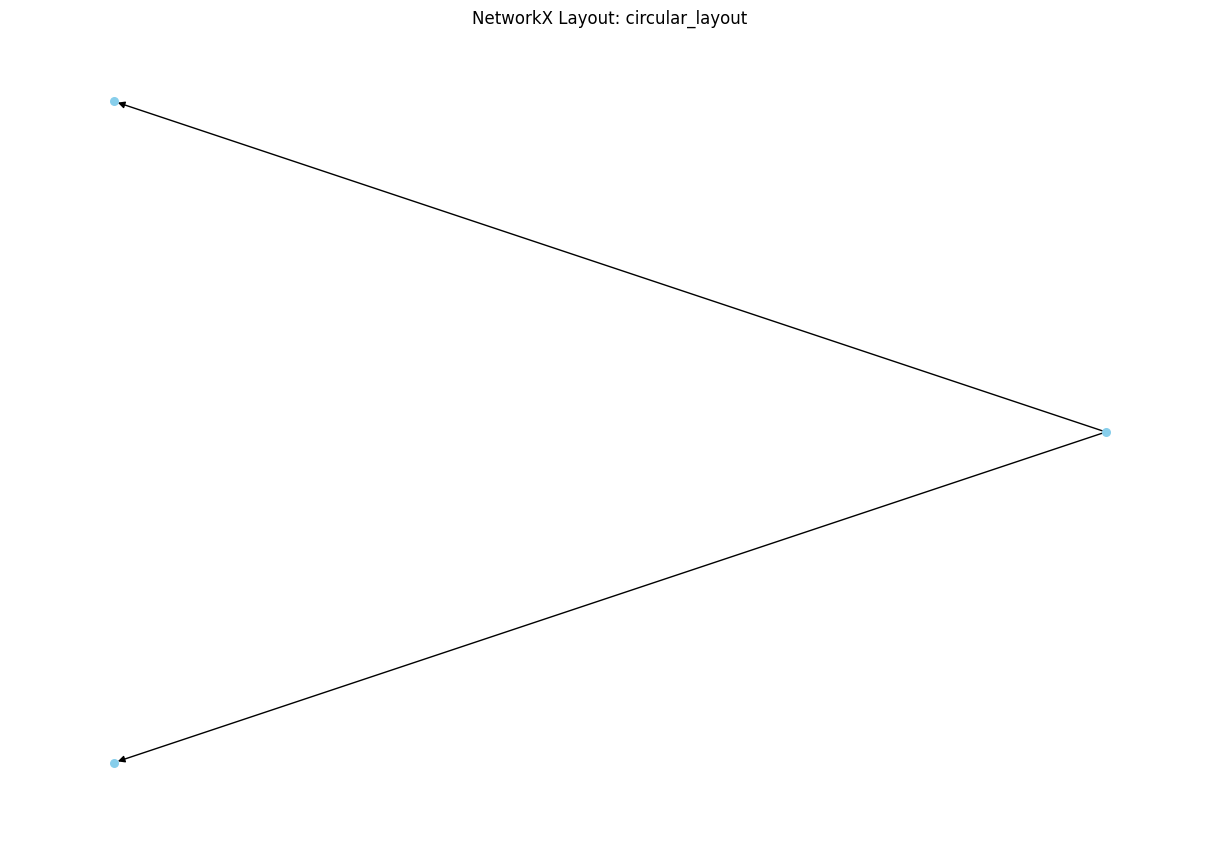

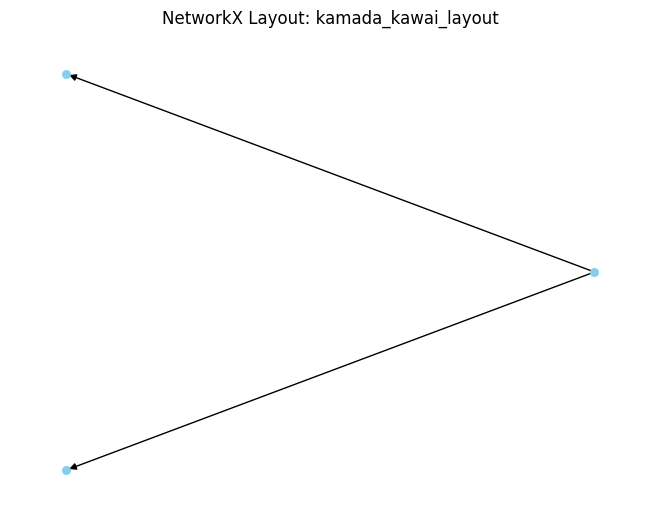

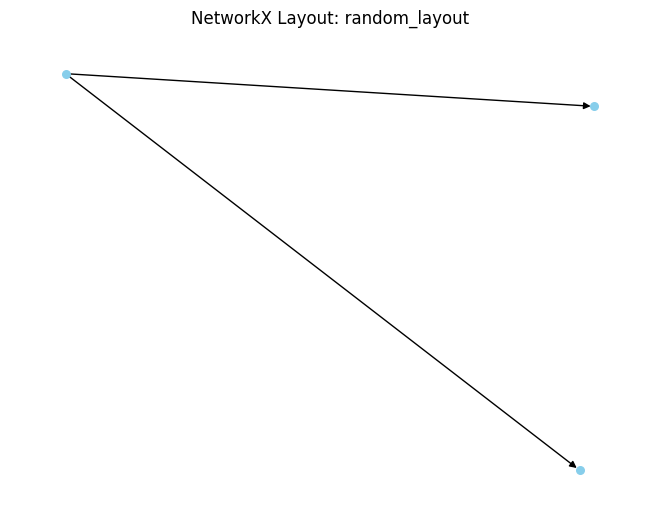

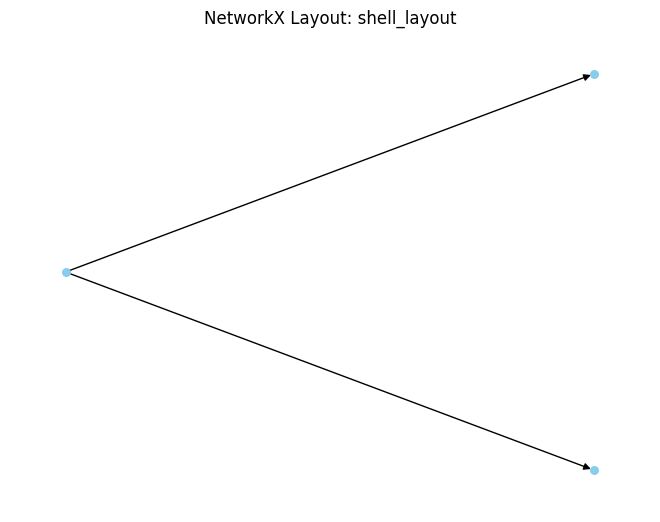

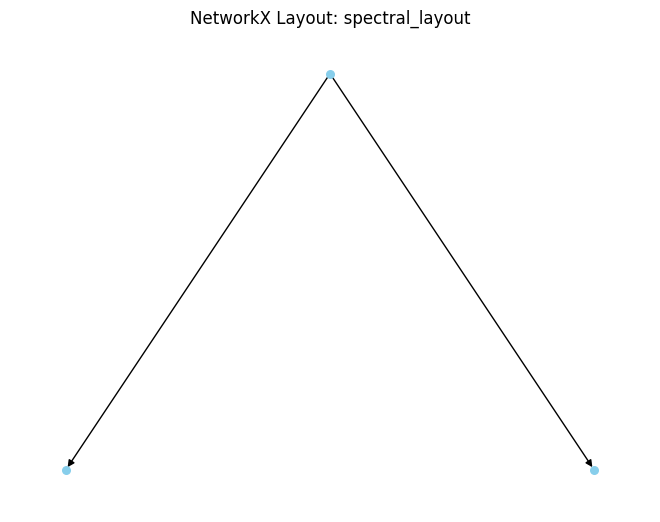

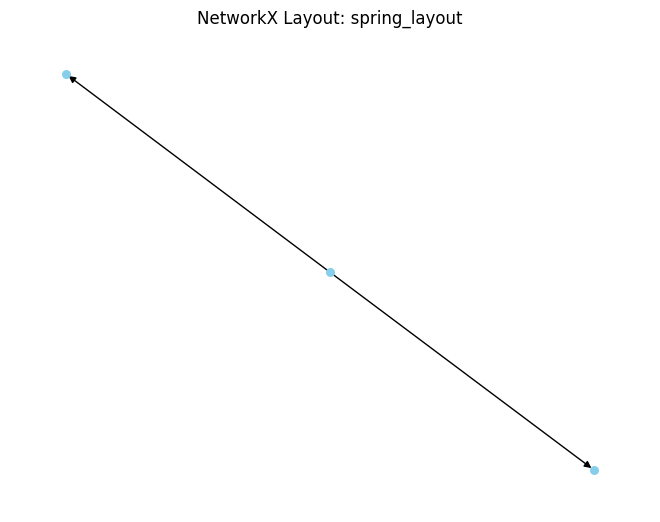

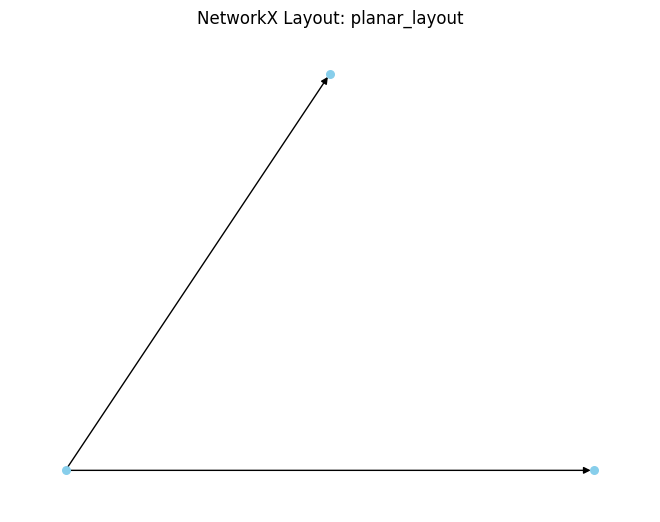

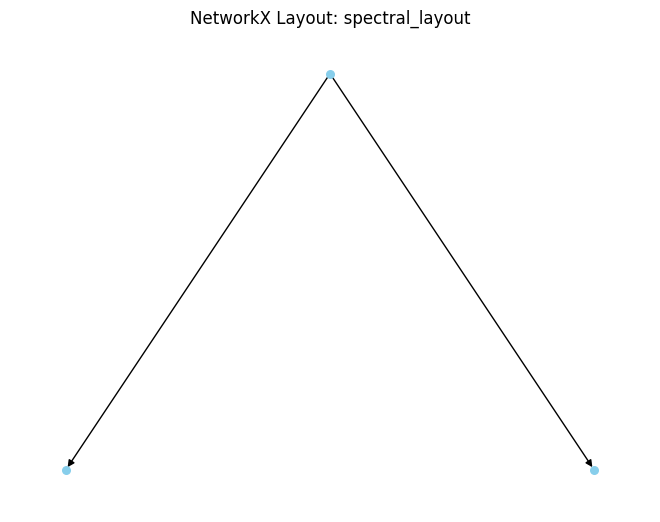

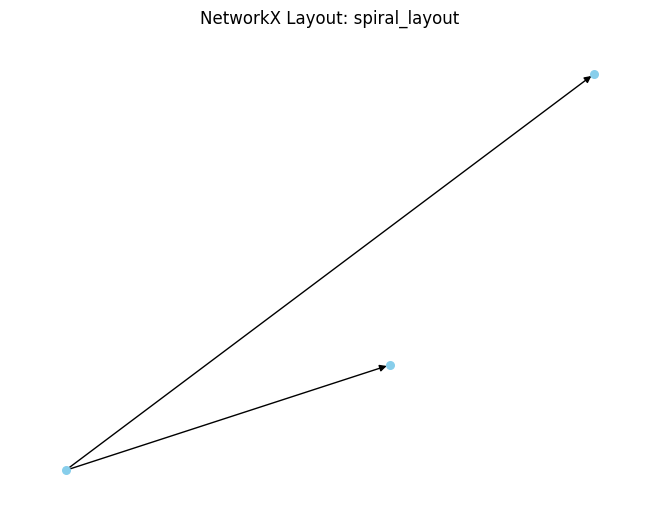

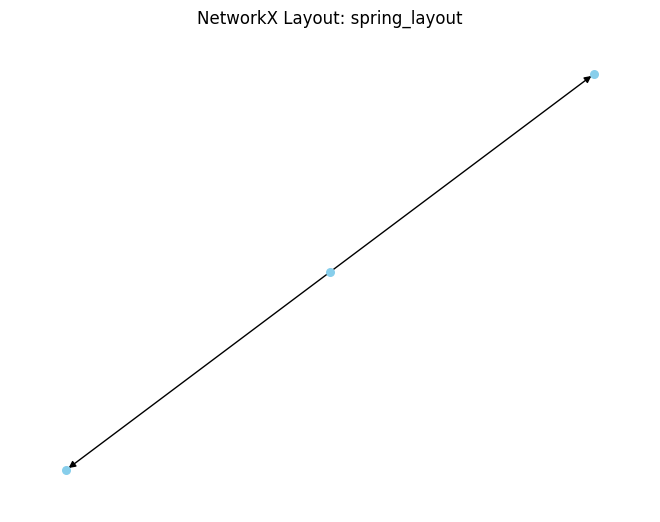

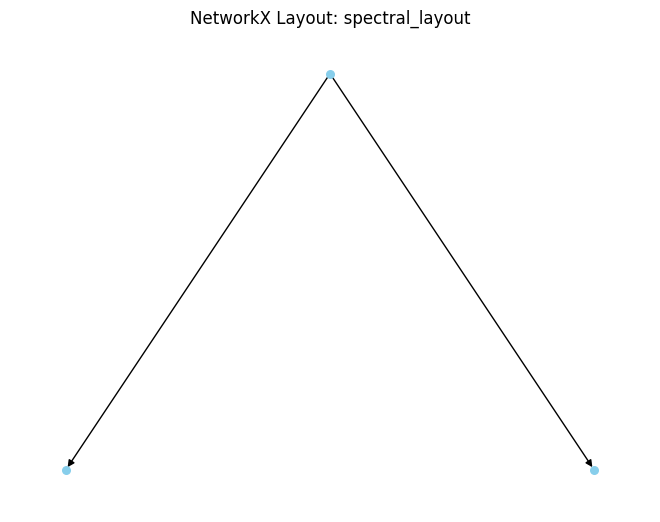

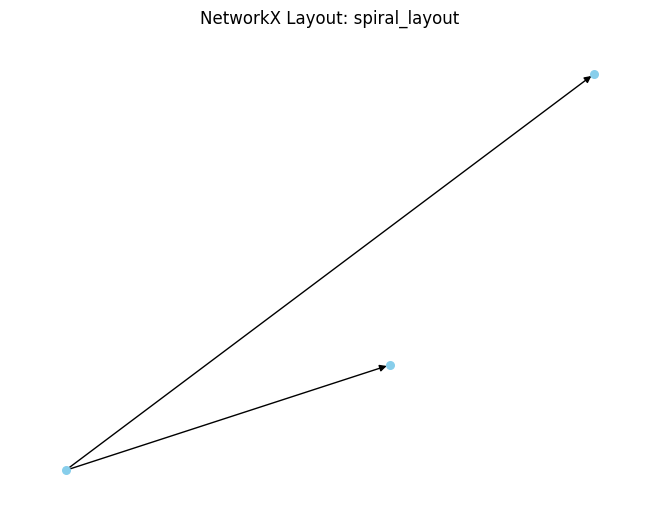

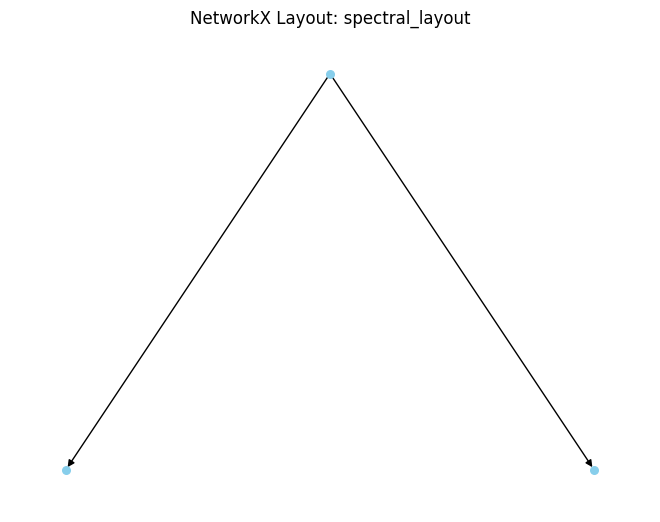

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Assuming df is already defined from your previous code

# Initialize a directed graph
G = nx.DiGraph()

# Add edges between clusters and their corresponding labels
# remove first two cols
df_depth = df_paths_xs.iloc[:, 2:]

# Extract unique chains from DataFrame
chains = df_depth.apply(lambda row: tuple(item for item in row if item), axis=1).unique()

# Add edges to the graph
for chain in chains:
    for i in range(len(chain) - 1):
        G.add_edge(chain[i], chain[i + 1])

# Draw the hierarchical tree
plt.figure(figsize=(12, 8))

networkx_layouts = [
    nx.circular_layout,
    nx.kamada_kawai_layout,
    nx.random_layout,
    nx.shell_layout,
    nx.spectral_layout,
    nx.spring_layout,
    nx.planar_layout,
    #nx.bipartite_layout,
    nx.spectral_layout,
    nx.spiral_layout,
    nx.fruchterman_reingold_layout,
    nx.spectral_layout,
    nx.spiral_layout,
    nx.spectral_layout,
]

for layout in networkx_layouts:
    pos = layout(G)
    nx.draw(G, pos, with_labels=False, node_size=30, node_color="skyblue", font_size=14)
    plt.title(f"NetworkX Layout: {layout.__name__}")
    plt.show()

In [61]:
import plotly.express as px


In [63]:
df_paths_xs

,branch_depth1,branch_depth2,branch_depth3,branch_depth4
0,Disorder/Disease,other,,
1,Study type,Clinical Evidence,,
2,Pharmacology,Pharmacokinetics,Analytical Methods,
3,Pharmacology,Pharmacodynamics,Mechanism of Action,
4,Disorder/Disease,Depression,,
5,Study type,Preclinical Evidence,in vivo,animal models of disorders
6,Study type,Preclinical Evidence,in vivo,other
7,Pharmacology,Pharmacokinetics,other,
8,Study type,Environmental Evidence,Fish,
9,Study type,Environmental Evidence,Wastewater,


In [64]:
import plotly.express as px
df = px.data.tips()
fig = px.icicle(df, path=[px.Constant("all"), 'day', 'time', 'sex'], values='total_bill')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

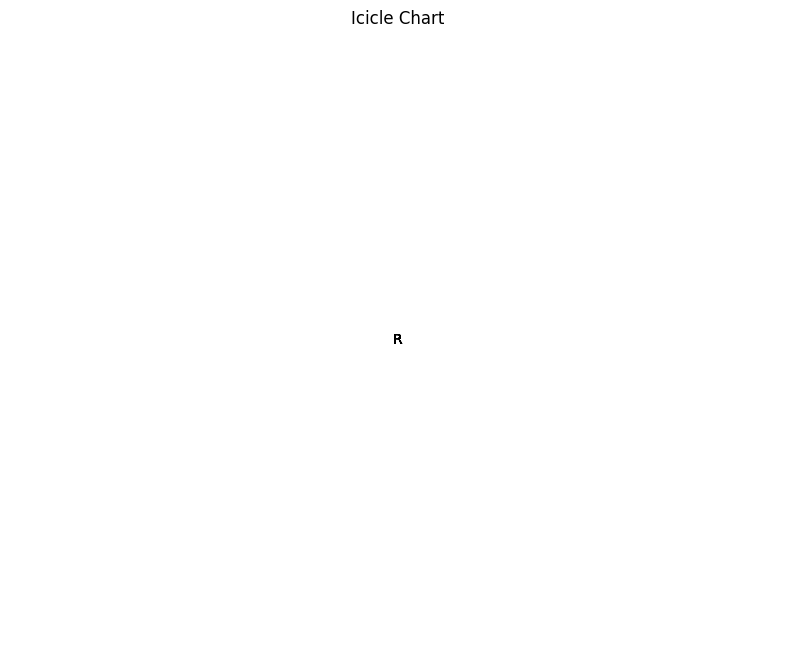

In [ ]:
import matplotlib.pyplot as plt
import squarify

# Your data
data = [
    ('Disorder/Disease', 'OCD'),
    ('Study type', 'Clinical Focus'),
    ('Special Populations', 'pregnancy'),
    ('Pharmacology', 'Pharmacokinetics', 'Analytical Methods'),
    ('Pharmacology', 'Pharmacodynamics', 'Mechanism of Action', 'Animal models'),
    ('Disorder/Disease', 'Depression'),
    ('Study type', 'Preclinical Focus', 'animal models of disorders', 'chronic unpredictable mild stress'),
    ('Pharmacology', 'Pharmacodynamics', 'Mechanism of Action', 'Receptor studies'),
    ('Study type', 'Preclinical Focus', 'in vivo')
]

# Convert data to a format suitable for plotting
icicle_data = {}
for entry in data:
    current_dict = icicle_data
    for category in entry:
        current_dict = current_dict.setdefault(category, {})

# Plot the icicle chart
plt.figure(figsize=(10, 8))
squarify.plot(sizes=[100], label="Root", alpha=0, color="white")
squarify.plot(sizes=[100], label="Root", alpha=0, color="white")
squarify.plot(sizes=[100], label="Root", alpha=0, color="white")

squarify.plot(sizes=[100], label="Root", alpha=0, color="white")

squarify.plot(sizes=[100], label="Root", alpha=0, color="white")
squarify.plot(sizes=[100], label="Root", alpha=0, color="white")
squarify.plot(sizes=[100], label="Root", alpha=0, color="white")
squarify.plot(sizes=[100], label="Root", alpha=0, color="white")
squarify.plot(sizes=[100], label="Root", alpha=0, color="white")

plt.title("Icicle Chart")
plt.axis('off')
plt.show()
